In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
mdc = pd.read_csv('report-phylum.tsv', sep='\t').T
mdc.drop(['Numero da amostra','Nome da amostra','TOTAL', 'Local-Etapa'],inplace=True)
mdc.reset_index(level=0, inplace=True)
mdc.head()

,index,0,1
0,Acidobacteria,0,1
1,Actinobacteria,263,75
2,Bacteroidetes,411,18
3,Euryarchaeota,361,10
4,Firmicutes,258,1091


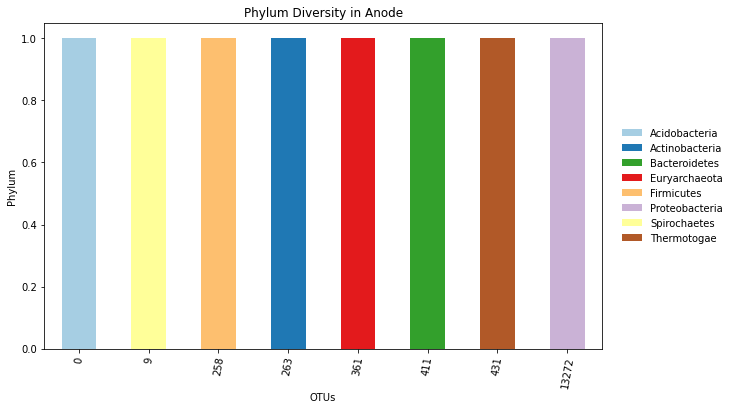

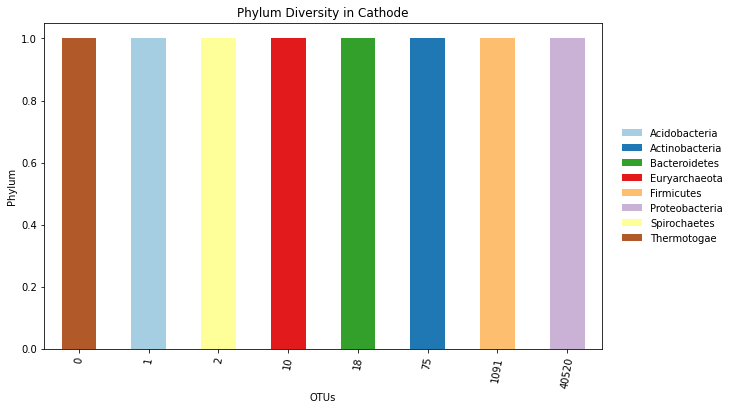

In [5]:
new_mdc = mdc.rename(columns={"index": "phylum", 0: "anode", 1: "cathode"})
new_mdc.head()
new_mdc.groupby(['anode', 'phylum']).size().unstack().plot(kind='bar',colormap='Paired', stacked=True, figsize=(10,6))
plt.legend(frameon=False, ncol=1, loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.ylabel('Phylum')
plt.xlabel('OTUs')
plt.xticks(rotation=80)
plt.title('Phylum Diversity in Anode')
plt.show()
new_mdc.groupby(['cathode', 'phylum']).size().unstack().plot(kind='bar',colormap='Paired', stacked=True, figsize=(10,6))
plt.legend(frameon=False, ncol=1, loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.ylabel('Phylum')
plt.xlabel('OTUs')
plt.xticks(rotation=80)
plt.title('Phylum Diversity in Cathode')
plt.show()

## Anode

In [51]:
mdc_anod = mdc.copy().drop(mdc.columns[[2]], axis=1)
new_df = mdc_anod[mdc_anod[0] > 200]
new_df.loc[len(new_df)] = ["Others", mdc_anod[mdc_anod[0] <= 200][0].sum()]
new_df

/home/mone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,0
1,Actinobacteria,263
2,Bacteroidetes,411
3,Euryarchaeota,361
4,Firmicutes,258
5,Proteobacteria,13272
7,Thermotogae,431
6,Others,9


In [68]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1 to 6
Data columns (total 2 columns):
index    7 non-null object
0        7 non-null object
dtypes: object(2)
memory usage: 168.0+ bytes


In [46]:
new_df_2=np.array(new_df)
new_df_2

array([['Actinobacteria', 263],
       ['Bacteroidetes', 411],
       ['Euryarchaeota', 361],
       ['Firmicutes', 258],
       ['Proteobacteria', 13272],
       ['Thermotogae', 431],
       ['Others', 9]], dtype=object)

In [48]:
order = []
anode = []
for item in new_df_2:
    order.append(item[0])
    anode.append(item[1])   

In [39]:
type(order), type(anode)

(list, list)

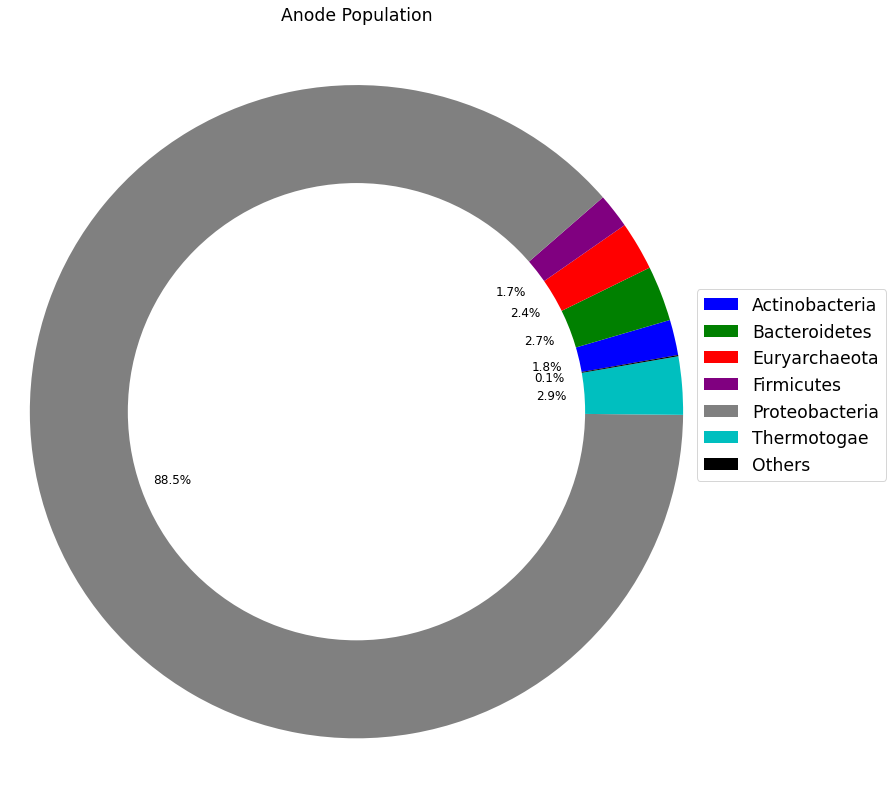

In [56]:
from __future__ import division
from matplotlib import colors as mcolors
labels = order[0:33]
sizes = anode[0:33]
colors = 'Blue', 'Green', 'red','purple', 'grey', 'c', 'black'
fig1, ax1 = plt.subplots(figsize=(10,11))
patches, texts, autotexts = ax1.pie(sizes, colors=colors,autopct='%1.1f%%',
        labeldistance=1.04, pctdistance=0.6, shadow=False, startangle=10)
for t in texts:
    t.set_size('xx-large')
for t in autotexts:
    t.set_size('large')
    autotexts[0].set_color('k')
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Anode Population', fontsize='xx-large')
plt.legend(labels, bbox_to_anchor=(0.975,0.67),fontsize='xx-large', loc="upper left")
plt.savefig('genero_anode.png', dpi = 400)
plt.show()

## Cathode

In [45]:
mdc_cathod = mdc.copy().drop(mdc.columns[[1]], axis=1)
new_df2 = mdc_cathod[mdc_cathod[1] > 50]
new_df2.loc[len(new_df2)] = ["Others", mdc_cathod[mdc_cathod[1] <= 50][1].sum()]
new_df2

/home/mone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,1
1,Actinobacteria,75
4,Firmicutes,1091
5,Proteobacteria,40520
3,Others,31


In [76]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 3
Data columns (total 2 columns):
index    4 non-null object
1        4 non-null object
dtypes: object(2)
memory usage: 96.0+ bytes


In [47]:
new_df_3=np.array(new_df2)
new_df_3

array([['Actinobacteria', 75],
       ['Firmicutes', 1091],
       ['Proteobacteria', 40520],
       ['Others', 31]], dtype=object)

In [49]:
order2 = []
cathode = []

for item in new_df_3:
    order2.append(item[0])    
    cathode.append(item[1])

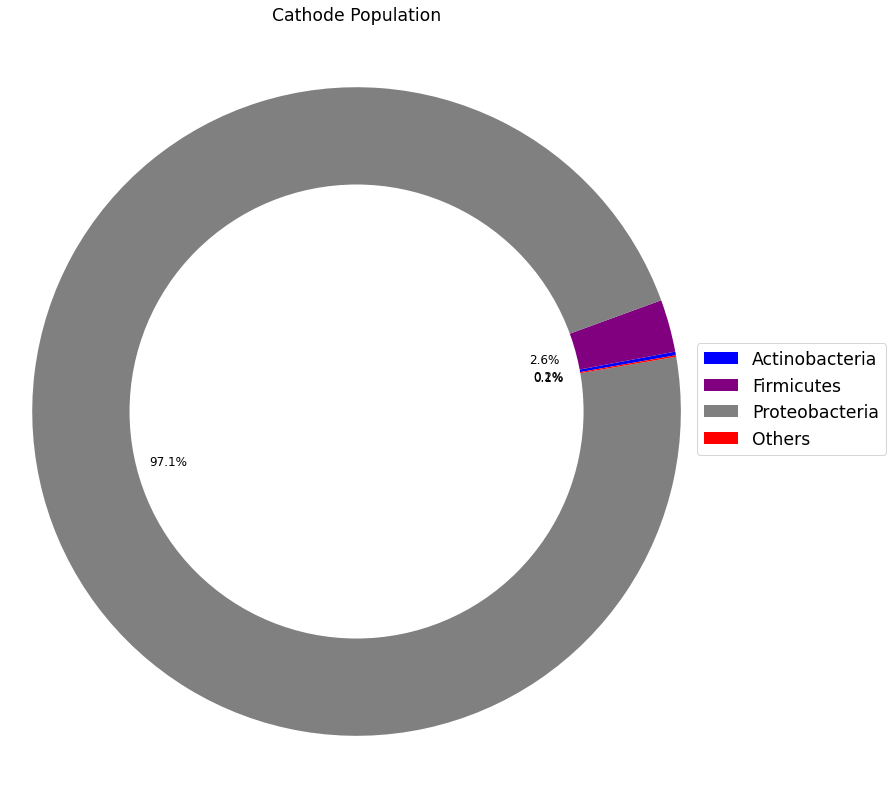

In [57]:
from __future__ import division
from matplotlib import colors as mcolors
labels = order2[0:33]
sizes = cathode[0:33]
colors = 'Blue', 'purple','grey','red'
fig1, ax1 = plt.subplots(figsize=(10,11))
patches, texts, autotexts = ax1.pie(sizes, colors=colors,autopct='%1.1f%%',
        labeldistance=1.04, pctdistance=0.6, shadow=False, startangle=10)
for t in texts:
    t.set_size('xx-large')
for t in autotexts:
    t.set_size('large')
    autotexts[0].set_color('k')
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Cathode Population', fontsize='xx-large')
plt.legend(labels, bbox_to_anchor=(0.975,0.6),fontsize='xx-large', loc="upper left")
plt.savefig('filo_cathode.png', dpi = 400)
plt.show()